In [2]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import os
import time
from math import log, e
import math

In [3]:
# Function to evaluate the entropy of a vector
# INPUTS
# - labels: vector to compute entropy
# - base: base of the log for the computation of entropy
# OUTPUT: entropy values
def entropy(labels, base=None):

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

# Function to evaluate the entropy of a file as a function of the header lenght
# INPUTS
# - file: the file we want to anlyze (formats as an integer vector)
# - Bytes: total number of bytes we want to consider in the analysis
# OUTPUT: vector that contains the entropy values as a function of the header lenght analyzed

def entropy_analysis(file):
    num_bytes = math.ceil(len(file)/8)
    h_vector = np.zeros(num_bytes)
    for i in range(num_bytes):
        h_vector[i] = entropy(file[0:8*(i+1)], base=2)
    return h_vector

# Function to transform the file of the dataset in a vector ready to be analyzed
# INPUTS
# - file: the file from the dataset we want to analyze
# - size: the size of the file we want to cut
# OUTPUT: file vector
def file_to_vector(file, start, offset):
    vec = np.zeros(offset)
    for i in range(offset):
        vec[i] = int.from_bytes(bytes(file[start + i], 'latin-1'), byteorder="big")
    return vec

#analyze the differential area of file_vector from the byte at position start to the byte at position end
def entropies(ideal_file, file_vector, offset):
    h_ideal = np.zeros(int(offset/8))
    h = np.zeros(int(offset/8))
    h_ideal = entropy_analysis(ideal_file[0:offset])
    h = entropy_analysis(file_vector[0:offset])
    return h_ideal,h

In [4]:
offset = 256

ideal_file = np.zeros(offset)
for i in range(offset):
    ideal_file[i]=randint(0,255)

# Obtains all paths to analyze from a .txt files
#f = open('./paths.txt', 'r')
f = open('../NapierOneDataset/PDF/PDF-tiny/0001-pdf.pdf', 'r', encoding='latin-1')
file = f.read()
file_vector = file_to_vector(file, 0, offset)
random_ent, file_ent = entropies(ideal_file, file_vector, offset)
f.close()

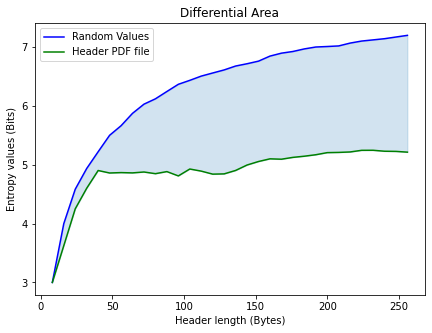

In [10]:
hl = [8*i for i in range(1,33)]
# Plot of the accuracies obtained using different threshold and different header lengths
plt.figure(figsize=(7,5))
plt.title("Differential Area")
plt.xlabel("Header length (Bytes)")
plt.ylabel("Entropy values (Bits)")
plt.plot(hl, random_ent, color="blue", label="Random Values")
plt.plot(hl, file_ent, color="green", label="Header PDF file")
plt.fill_between(hl, file_ent, random_ent, color='C0', alpha=0.2)
plt.legend()
plt.show()